In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pricing par méthode de Monte-Carlo

## Méthode de simulation

On a l'expression du rendement de l'actif sous-jacent S :

$\frac{dS_t}{S_t}=(r-d)d t+\sigma d W_t$

où r, d, σ, W sont respectivement le taux sans risque, le taux de dividende, la volatilité et le mouvement brownien.

# Mouvement brownien

Définissons tout d'abord le mouvement brownien :

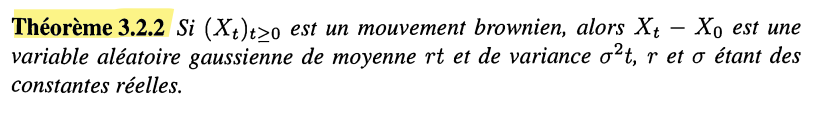

In [2]:
def delta_t(n, T):
    t = np.linspace(0, T, n)
    dt = t[1] - t[0]
    return t, dt

In [3]:
def mouvement_brownien(n, T, x0, r, sigma):
    t, dt = delta_t(n, T)
    B = np.zeros(n)
    B[0] = x0
    for i in range(1, n):
        B[i] = B[i-1] + np.random.normal(loc=r*dt, scale=sigma*np.sqrt(dt))
    return B

In [4]:
def mouvement_brownien_standard(n, T):
    return mouvement_brownien(n, T, 0, 0, 1)

In [5]:
n = 10
T = 1
t, dt = delta_t(n, T)
W = mouvement_brownien_standard(n, T)
print(t)
print(W)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 0.          0.2231712   0.13296005 -0.04991735 -0.1025123   0.34249398
  0.18047425  0.16564682  0.61975902  0.95752473]


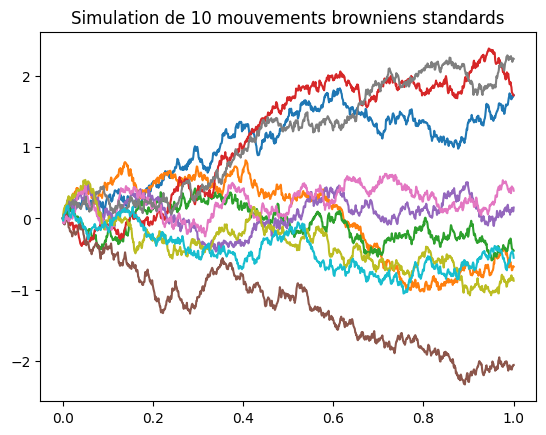

In [6]:
n = 1000
T = 1
for j in range(10):
    t, dt = delta_t(n, T)
    B = mouvement_brownien_standard(n, T)
    plt.plot(t, B)
    plt.title("Simulation de 10 mouvements browniens standards")

# Black-Scholes

On a la formule de Black-Scholes :

$dS_t = S_t(\mu dt + \sigma dB_t)$

où $\mu$ et $\sigma$ sont deux constantes et $(B_t)$ un mouvement brownien standard.

Soit 

$S_t = S_0 \exp (\mu t - \frac{\sigma^2}{2}t + \sigma B_t)$

Avec les notations de l'exercice on a :

$S_t = S_0 \exp ((r-d) t - \frac{\sigma^2}{2}t + \sigma W_t)$

In [7]:
def black_scholes(S0, n, T, r, d, sigma, renvoie_brownien=False):
    temps, dt = delta_t(n, T)
    W = mouvement_brownien_standard(n, T)
    S = []
    for t, Wt in zip(temps, W):
        S.append(S0*np.exp((r-d)*t - sigma**2*t/2 + sigma*Wt))
    if renvoie_brownien:
        return S, W
    return S

In [8]:
def plot_black_scholes(S0, n, T, r, d, sigma, nb_simu):
    fig, ax = plt.subplots(2)
    temps, dt = delta_t(n, T)
    for _ in range(nb_simu):
        prix, W = black_scholes(S0, n, T, r, d, sigma, renvoie_brownien=True)
        ax[0].plot(temps, W)
        ax[0].set_title("Mouvement brownien")
        ax[0].label_outer()
        ax[1].plot(temps, prix)
        ax[1].set_title("Evolution du prix du sous-jacent")

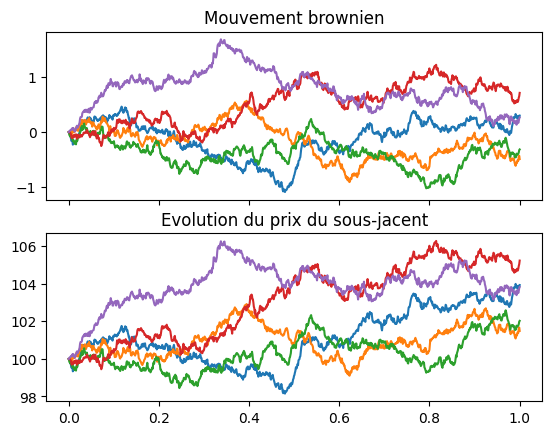

In [9]:
S0 = 100
n = 1000
T = 1
r = 0.05
d = 0.02
volatilite = 0.03
plot_black_scholes(S0, n, T, r, d, volatilite, 5)

## Simulation paramétrique

Supposons des simulations sur 3 ans, avec des variations du taux sans risque, des taux de dividende et de la volatilité :

In [10]:
T = 3
n = 9000
temps, dt = delta_t(n, T)
nb_1_an = n//T

### Taux sans risque

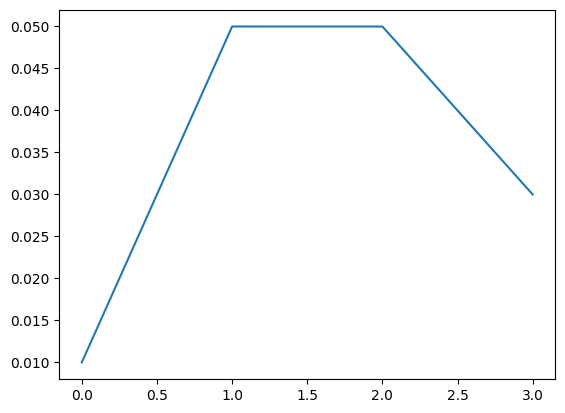

In [11]:
taux_sans_risque = np.append(np.linspace(0.01, 0.05, nb_1_an), np.array([0.05]*nb_1_an))
taux_sans_risque = np.append(taux_sans_risque,np.linspace(0.05, 0.03, nb_1_an))
plt.plot(temps, taux_sans_risque)

### Taux de dividende

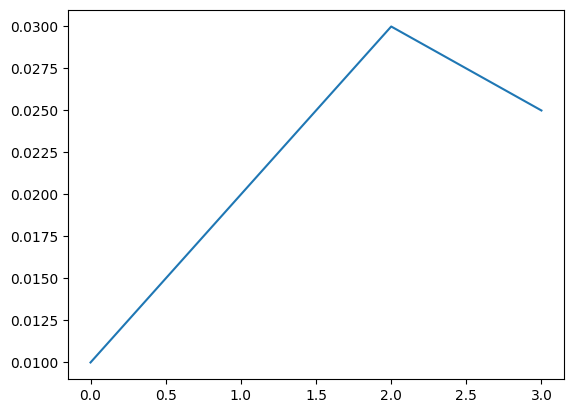

In [12]:
taux_dividende = np.append(np.linspace(0.01, 0.03, 2*nb_1_an), np.linspace(0.03, 0.025, nb_1_an))
plt.plot(temps, taux_dividende)

### Volatilité

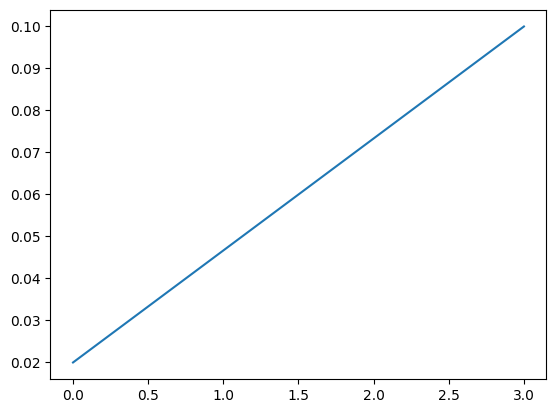

In [13]:
volatilite = np.linspace(0.02, 0.1, 3*nb_1_an)
plt.plot(temps, volatilite)

### Ensemble des paramètres

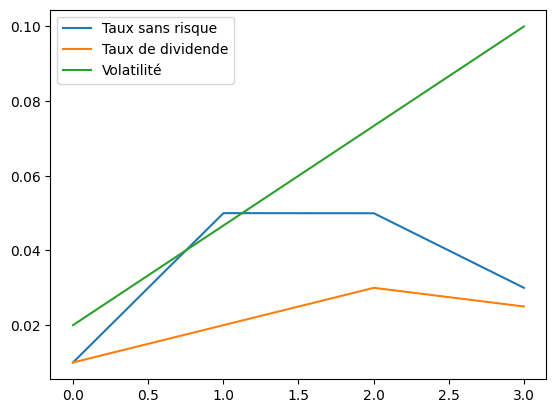

In [14]:
plt.plot(temps, taux_sans_risque)
plt.plot(temps, taux_dividende)
plt.plot(temps, volatilite)
plt.legend(["Taux sans risque","Taux de dividende","Volatilité"])

In [17]:
def black_scholes_para(S0, n, T, r, d, sigma, renvoie_brownien=False):
    W = mouvement_brownien_standard(n, T)
    temps, dt = delta_t(n, T)
    S = []
    for t, W_t, r_t, d_t, sigma_t in zip(temps, W, r, d, sigma):
        S.append(S0*np.exp((r_t-d_t)*t - sigma_t**2*t/2 + sigma_t*W_t))
    if renvoie_brownien:
        return S, W
    return S

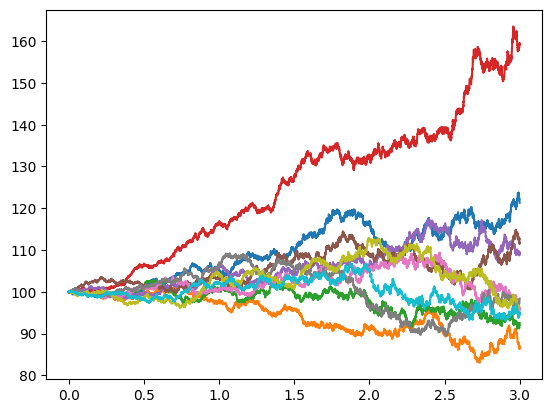

In [20]:
temps, dt = delta_t(n, T)
for _ in range(10):
    S = black_scholes_para(S0, n, T, taux_sans_risque, taux_dividende, volatilite)
    plt.plot(temps, S)

# Payoff

In [21]:
def call_europeen(S, K):
    return max(S[-1]-K, 0)

(array([647., 104.,  91.,  71.,  31.,  25.,  19.,   7.,   2.,   3.]),
 array([ 0.        ,  1.69062225,  3.38124451,  5.07186676,  6.76248902,
         8.45311127, 10.14373352, 11.83435578, 13.52497803, 15.21560029,
        16.90622254]),
 <BarContainer object of 10 artists>)

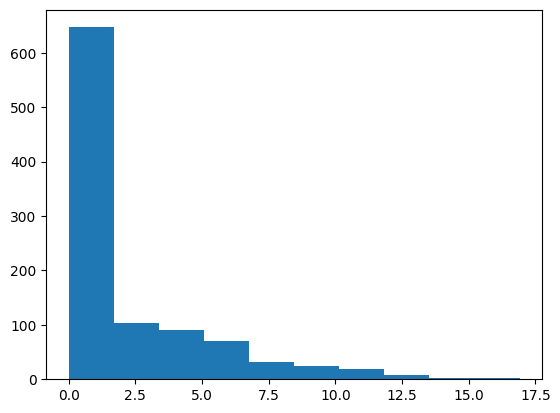

In [33]:
T = 1
n = T*3000
temps, dt = delta_t(n, T)
S0 = 100
K = 103
H = []
for _ in range(1000):
    S = black_scholes_para(S0, n, T, taux_sans_risque, taux_dividende, volatilite)
    H.append(call_europeen(S, K))
plt.hist(H)

## Option asiatique

### Dans le cas continu

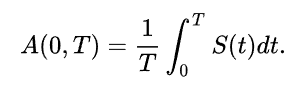

### Dans le cas discret

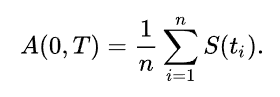

In [34]:
def call_asiatique(S, K):
    return max(np.mean(S)-K, 0)

Text(0.5, 1.0, "Payoff d'une option asiatique")

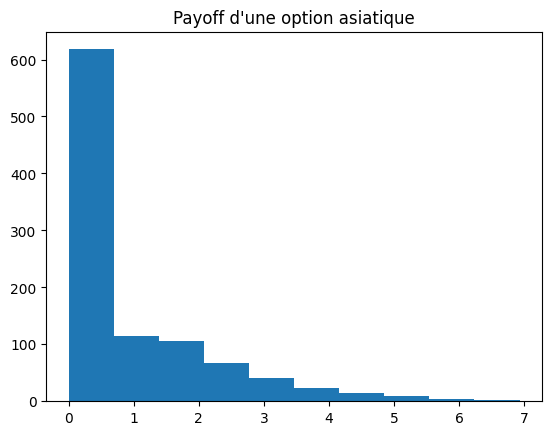

In [41]:
T = 1
n = T*3000
temps, dt = delta_t(n, T)
S0 = 100
K = 101
H = []
for _ in range(1000):
    S = black_scholes_para(S0, n, T, taux_sans_risque, taux_dividende, volatilite)
    H.append(call_asiatique(S, K))
plt.hist(H)
plt.title("Payoff d'une option asiatique")

# Prix initial

$\pi _0^H = \frac{1}{(1+r)^N}\mathbb{E}_*(H)$

ou

$\pi _0^H = e^{-rT}\mathbb{E}_*(H)$

In [59]:
def prix_instant_initial(taux_sans_risque, T, esperance_h):
    return np.exp(-taux_sans_risque*T)*esperance_h

In [57]:
T = 3
n = T*3000
temps, dt = delta_t(n, T)
taux_sans_risque = [0.03]*n
S0 = 100
K = 101
H = []
for _ in range(1000):
    S = black_scholes_para(S0, n, T, taux_sans_risque, taux_dividende, volatilite)
    H.append(call_asiatique(S, K))

In [58]:
esperance_h = np.mean(H)
esperance_h

2.7971879113245715

In [60]:
prix_instant_initial(0.03, T, esperance_h)

2.556437263223217